In [2]:
import pandas as pd

In [3]:
employees=pd.read_csv("employees.csv")
departments=pd.read_csv("departments.csv")


In [5]:
print(employees.head())
print(employees.info())
print(departments.head())
print(departments.info())

   EmployeeID           Name  Age  Department  Experience  Salary     City
0        1001     Jane Smith   50          HR          14  106820   Aarhus
1        1002   Alice Wilson   40       Sales          10  117498  Esbjerg
2        1003    Helen Davis   45       Sales          20   74131   Odense
3        1004  Charlie Smith   45  IT Support           2   97221   Aarhus
4        1005   Helen Wilson   23          HR           1   92955  Esbjerg
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  500 non-null    int64 
 1   Name        500 non-null    object
 2   Age         500 non-null    int64 
 3   Department  500 non-null    object
 4   Experience  500 non-null    int64 
 5   Salary      500 non-null    int64 
 6   City        500 non-null    object
dtypes: int64(4), object(3)
memory usage: 27.5+ KB
None
    Department  DeptID        

In [6]:
print(employees.isnull().sum())
print(departments.isnull().sum())

EmployeeID    0
Name          0
Age           0
Department    0
Experience    0
Salary        0
City          0
dtype: int64
Department    0
DeptID        0
Manager       0
dtype: int64


In [7]:
df=pd.merge(employees,departments,left_on="Department",right_on="Department")

In [8]:
import pandasql as ps

In [12]:
query1=""" 
SELECT City,COUNT(*) as No_Employees
FROM df
GROUP BY City
ORDER BY No_Employees DESC
LIMIT 1;
"""
print(ps.sqldf(query1,locals()))

     City  No_Employees
0  Aarhus           109


In [ ]:
#Average experiecne in each department
print(df.groupby('Department')['Experience'].mean())

Department
Engineering     9.682353
Finance        10.049383
HR             10.708333
IT Support      8.436782
Marketing       9.048780
Sales           8.548387
Name: Experience, dtype: float64


In [ ]:
#Employee count by department and city
print(df.groupby(['Department','City']).size().reset_index(name='Count'))

     Department        City  Count
0   Engineering     Aalborg     12
1   Engineering      Aarhus     16
2   Engineering  Copenhagen     22
3   Engineering     Esbjerg     17
4   Engineering      Odense     18
5       Finance     Aalborg     15
6       Finance      Aarhus     19
7       Finance  Copenhagen     15
8       Finance     Esbjerg     17
9       Finance      Odense     15
10           HR     Aalborg     16
11           HR      Aarhus     17
12           HR  Copenhagen     16
13           HR     Esbjerg     12
14           HR      Odense     11
15   IT Support     Aalborg     20
16   IT Support      Aarhus     24
17   IT Support  Copenhagen     11
18   IT Support     Esbjerg     15
19   IT Support      Odense     17
20    Marketing     Aalborg     19
21    Marketing      Aarhus     12
22    Marketing  Copenhagen     19
23    Marketing     Esbjerg     19
24    Marketing      Odense     13
25        Sales     Aalborg     20
26        Sales      Aarhus     21
27        Sales  Cop

In [ ]:
#Manager managing most employees
top_managers=df['Manager'].value_counts()
top_count=top_managers.max()
print(top_managers[top_managers==top_count])

Manager
Jane Smith    93
Name: count, dtype: int64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

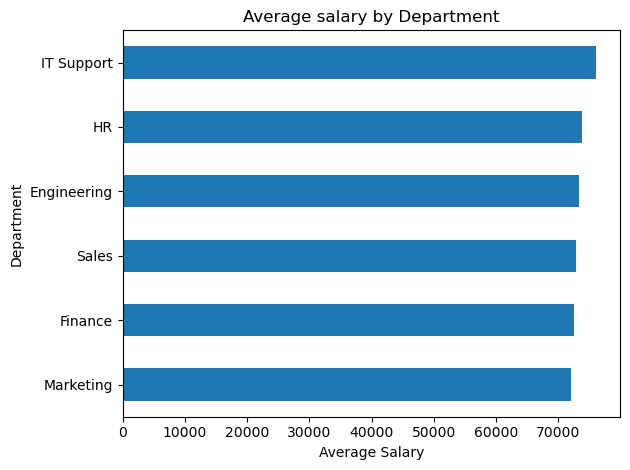

In [22]:
avg_salary=df.groupby('Department')['Salary'].mean().sort_values()
avg_salary.plot(kind='barh',title='Average salary by Department')
plt.xlabel('Average Salary')
plt.tight_layout()
plt.show()

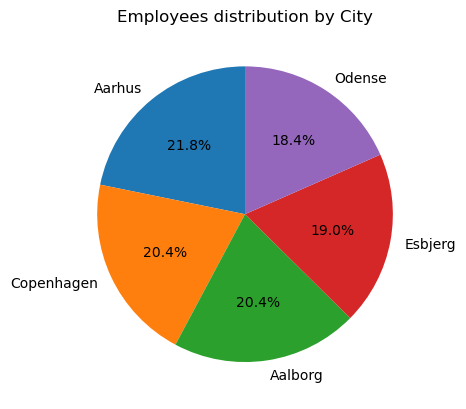

In [24]:
df['City'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.title('Employees distribution by City')
plt.ylabel("")
plt.show()

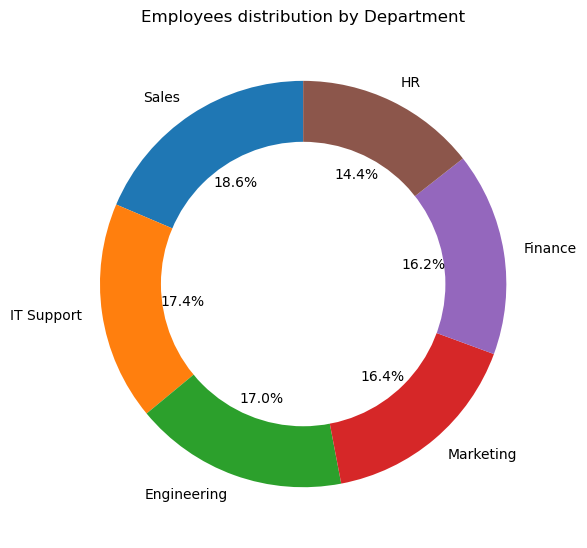

In [32]:
dept_counts=df['Department'].value_counts()
fig,ax=plt.subplots(figsize=(6,6))
wedges,texts,autotexts=ax.pie(
    dept_counts,
    labels=dept_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)
)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title("Employees distribution by Department")
plt.tight_layout()
plt.show()